### Perguntas para responder:
- Quais são os livros mais populares na amazon?
- Quais autores têm os livros mais bem avaliados?
- Qual é a distribuição de preços dos livros?
- Quais são os gêneros mais populares?
- Existem outliers nas classificações ou nos preços dos livros?

## 1. Carregando Bibliotecas

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carregando DataSet

In [23]:
data = pd.read_csv('data/BestSellerBooksofAmazon.csv')
data.head()

,Book Name,Author Name,Rating,Price
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,₹239.00
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,₹299.00
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,₹476.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,₹399.00
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,₹209.00


In [24]:
data = data.drop_duplicates(subset=['Book Name', 'Author Name'])

## 3. Conversão de Moeda

In [25]:
# Definir taxa de câmbio atual
taxa_cambio = 0.066 

# Remover a vírgula e o símbolo de moeda da coluna 'Price' e converter para tipo númerico (float)
data['Price'] = data['Price'].str.replace(',', '').str.replace('₹', '').astype(float)

# Converter de INR para BRL
data['Price_BRL'] = data['Price'] * taxa_cambio

# Arredondar os valores para duas casas decimais
data['Price_BRL'] = data['Price_BRL'].round(2)

# Exibir 
data.head()

,Book Name,Author Name,Rating,Price,Price_BRL
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,239.0,15.77
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,299.0,19.73
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,476.0,31.42
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,399.0,26.33
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,209.0,13.79


## 4. Análise dos dados

In [ ]:
livros_populares = data.sort_values(by='Rating', ascending=False)
print(livros_populares.head(10))

/var/folders/0j/mzsbvxr16hq3ym0t1y60byph0000gn/T/ipykernel_54003/3057857298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Book Name', data=livros_populares.head(10), palette='Blues_d')


<Axes: xlabel='Rating', ylabel='Book Name'>

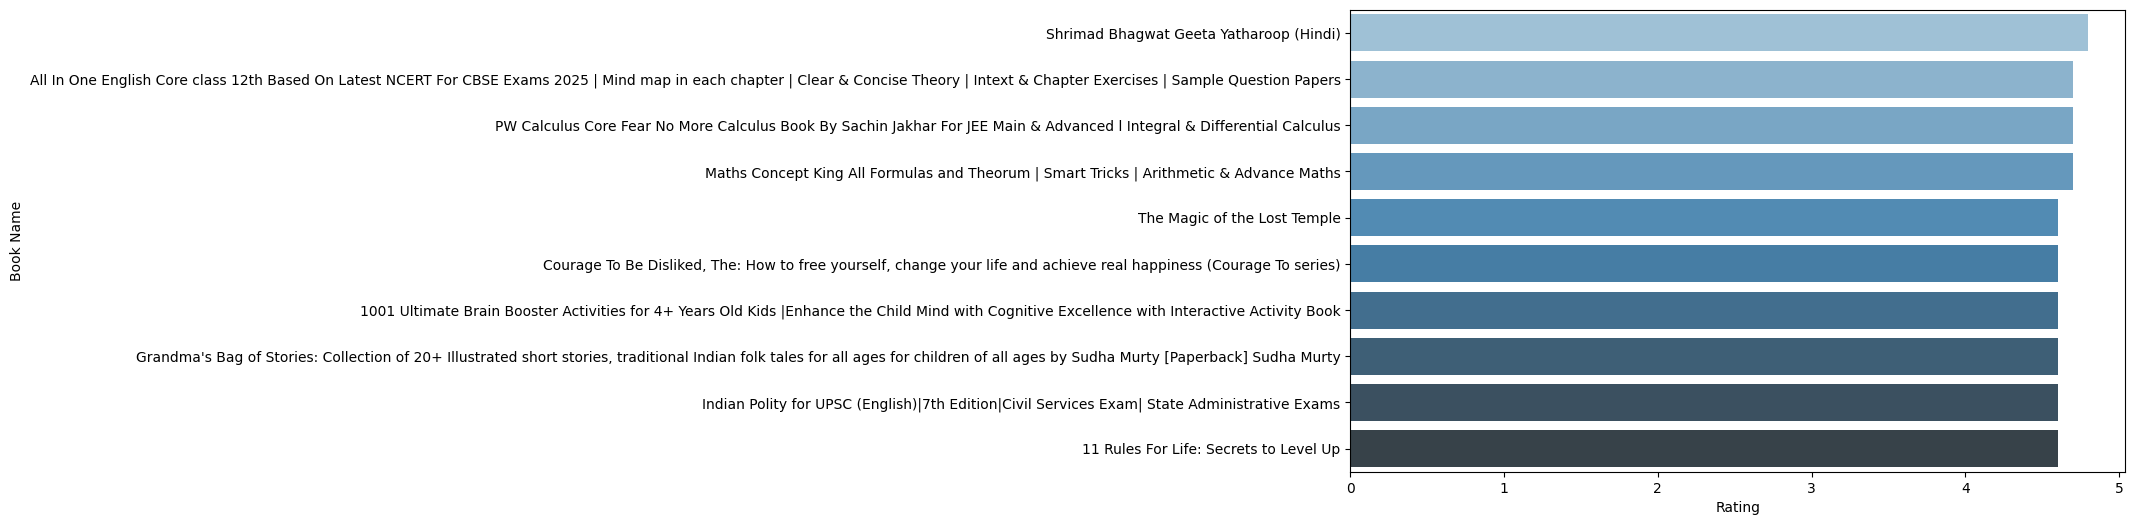

In [27]:
# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Book Name', data=livros_populares.head(10), palette='Blues_d')